In [42]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [43]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float # balls per boundry
    boundary_percnt: float
    summary: str

In [44]:
def calc_sr(state: BatsmanState):
    sr = (state['runs'] / state['balls']) * 100

    return {'sr': sr}

In [47]:
def calc_bpb(state: BatsmanState):
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    return {'bpb': bpb}

In [58]:
def calc_boundary_percnt(state: BatsmanState):
    boundary_percnt = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    return {'boundary_percnt': boundary_percnt}

In [59]:
def summary(state: BatsmanState):
    summary = f"""
    Strike Rate: {state['sr']:.2f}
    Balls per Boundary: {state['bpb']:.2f}
    Boundary Percentage: {state['boundary_percnt']:.2f}%
    """

    return {'summary': summary}

In [61]:
graph = StateGraph(BatsmanState)

graph.add_node("calc_sr", calc_sr)
graph.add_node("calc_bpb", calc_bpb)
graph.add_node("calc_boundary_percnt", calc_boundary_percnt)
graph.add_node("summary", summary)

#edges

graph.add_edge(START, "calc_sr")
graph.add_edge(START, "calc_bpb")
graph.add_edge(START, "calc_boundary_percnt")

graph.add_edge('calc_sr', 'summary')
graph.add_edge('calc_bpb', 'summary')
graph.add_edge('calc_boundary_percnt', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()

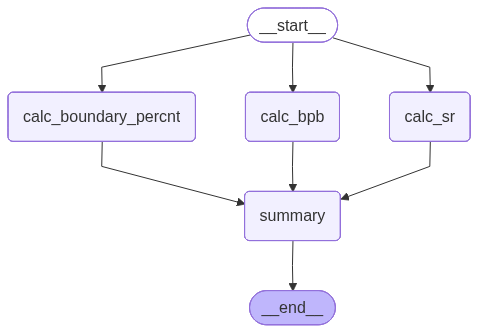

In [62]:
workflow

In [63]:
INITIAL_STATE = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}

#in parallel workflow, state access may create issues if we return the whole state

workflow.invoke(INITIAL_STATE)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percnt': 48.0,
 'summary': '\n    Strike Rate: 200.00\n    Balls per Boundary: 5.00\n    Boundary Percentage: 48.00%\n    '}